In [1]:
cd ~/

/mnt/homes/home024/nwilming


In [2]:
%pylab
%load_ext autoreload
%autoreload 2
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
import mne
import pandas as pd


In [4]:
subject=4

In [5]:
df = pd.read_hdf('/home/nwilming/conf_data/S%02i-stimulus-srcpow.hdf'%subject)
df = df.set_index(['time', 'trial', 'snum'])


In [6]:
from conf_analysis.meg import preprocessing
epochs, meta = preprocessing.get_epochs_for_subject(subject, 'stimulus')
del epochs

/home/nwilming/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [19]:
from joblib import Parallel, delayed

def foo(df, area):
    print area
    stuff = []
    darea = pd.pivot_table(df, values=area, index='trial', columns='time')
    darea = darea.subtract(darea.loc[:,0.5:0.75].mean(1), 'index')
    cvals = np.vstack(meta.loc[darea.index.values, 'contrast_probe'])
    for cp in range(10):
        res = {}
        cc = [corrcoef(cvals[:, cp], abs(darea.loc[:, col].values))[0,1] for col in darea]
        res['area'] = area
        res['sample'] = cp
        res['corr'] = cc
        res['time'] = darea.columns.values
        stuff.append(pd.DataFrame(res))
    return pd.concat(stuff)

cc = Parallel(n_jobs=8)([delayed(foo)(df, area) for area in df.columns if 'pca' in area])

pca-FEF-lh
pca-FEF-rh
pca-IPS0-lh
pca-IPS0-rh
pca-IPS1-lh
pca-IPS1-rh
pca-IPS2-lh
pca-IPS2-rh
pca-IPS3-lh
pca-IPS3-rh
pca-IPS4-lh
pca-IPS4-rh
pca-IPS5-lh
pca-LO1-lh
pca-LO1-rh
pca-LO2-lh
pca-LO2-rh
pca-PHC1-lh
pca-PHC1-rh
pca-PHC2-lh
pca-PHC2-rh
pca-SPL1-lh
pca-SPL1-rh
pca-TO1-lh
pca-TO1-rh
pca-TO2-lh
pca-TO2-rh
pca-V1d-lh
pca-V1d-rh
pca-V1v-lh
pca-V1v-rh
pca-V2d-lh
pca-V2d-rh
pca-V2v-lh
pca-V2v-rh
pca-V3A-lh
pca-V3A-rh
pca-V3B-lh
pca-V3B-rh
pca-V3d-lh
pca-V3d-rh
pca-V3v-lh
pca-V3v-rh
pca-VO1-lh
pca-VO1-rh
pca-VO2-lh
pca-VO2-rh
pca-hV4-lh
pca-hV4-rh


In [11]:
df.columns

Index([u'm-FEF-lh', u'm-FEF-rh', u'm-IPS0-lh', u'm-IPS0-rh', u'm-IPS1-lh',
       u'm-IPS1-rh', u'm-IPS2-lh', u'm-IPS2-rh', u'm-IPS3-lh', u'm-IPS3-rh',
       ...
       u'pca-V3d-lh', u'pca-V3d-rh', u'pca-V3v-lh', u'pca-V3v-rh',
       u'pca-VO1-lh', u'pca-VO1-rh', u'pca-VO2-lh', u'pca-VO2-rh',
       u'pca-hV4-lh', u'pca-hV4-rh'],
      dtype='object', length=196)

In [20]:
k = pd.concat(cc)

In [21]:
from scipy.ndimage import gaussian_filter

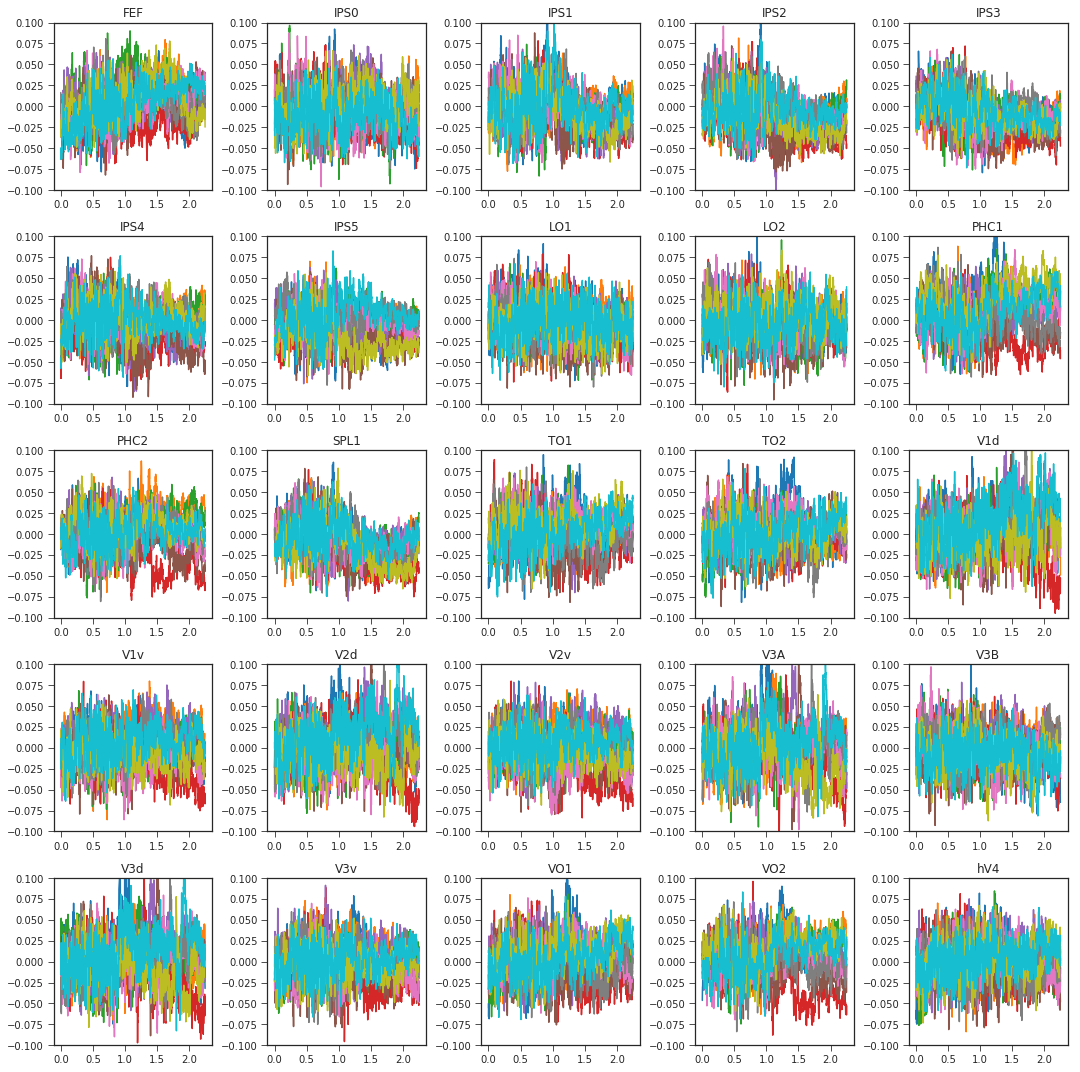

In [27]:
def plot_area(cc, **kwargs):
    for d, c in cc.groupby(['sample']):
        plot(c.time, c.loc[:, 'corr'], **kwargs)

areas = ['FEF', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5',
     'LO1', 'LO2', 'PHC1', 'PHC2', 'SPL1', 'TO1', 'TO2', 'V1d',
     'V1v', 'V2d', 'V2v', 'V3A', 'V3B', 'V3d', 'V3v', 'VO1', 
     'VO2' ,'hV4']

figure(figsize=(15, 15))
for i, area in enumerate(areas):
    subplot(5,5,i+1)
    plot_area(k.query('area=="pca-%s-lh"'%area))
    #plot_area(k.query('area=="%s-rh"'%area), color='b')
    ylim([-.1, .1])
    title(area)
tight_layout()

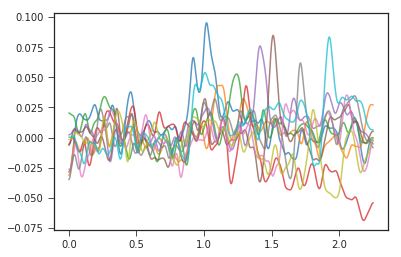

In [25]:
plot_area(k.query('area=="pca-%s-lh"'%'V3d'), alpha=0.75)